# Project V0.0.1
By Jason Ivey, Ziad Arafat, Jacob Yoder, & Kevin Dhanapal

Note it is best to vscode's inbuilt .venv for the the
kernel

In [2]:
# imports
import pandas
import pyvista
import numpy
import math
from pyvista import examples

Reading our data

In [3]:
# import ./data/meteorite_landings.csv
# header is row 0
data = pandas.read_csv('./data/meteorite_landings.csv', header=0)
data.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


PLotting earth

/home/ugrad10/zarafat/src/Metorite_Data_Mine/.venv/lib64/python3.11/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


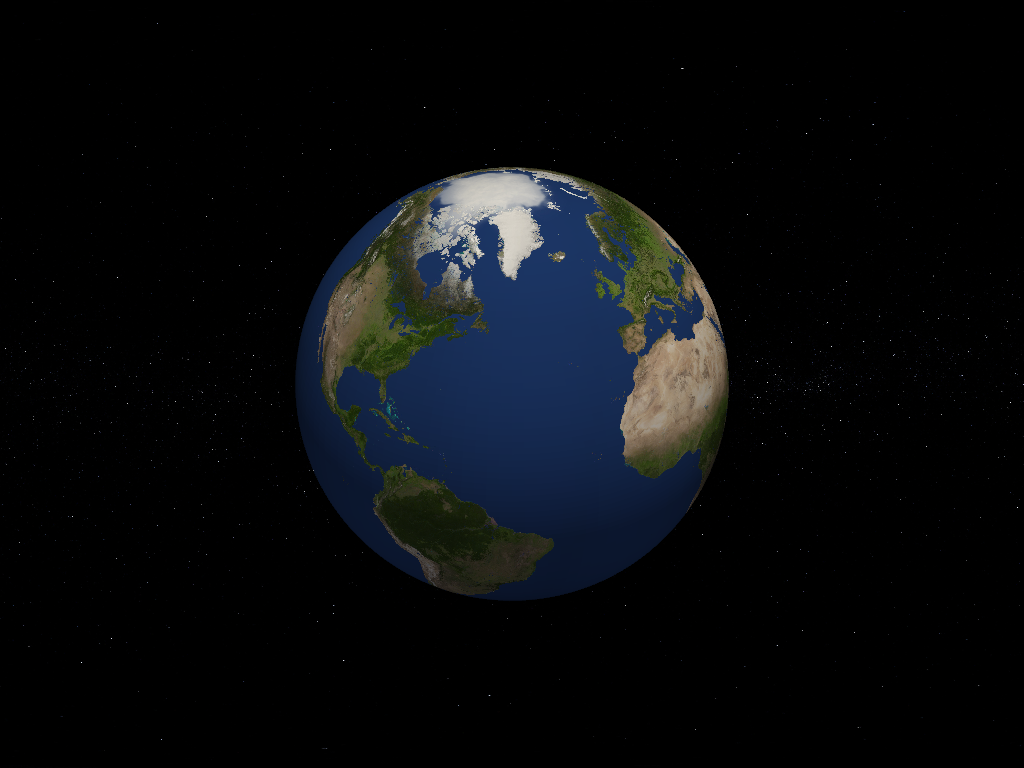

In [4]:
sphere = pyvista.Sphere(radius=1, theta_resolution=120, phi_resolution=120,
                        start_theta=270.001, end_theta=270)
sphere.active_t_coords = numpy.zeros((sphere.points.shape[0], 2))


sphere.active_t_coords[:, 0] = 0.5 + numpy.arctan2(-sphere.points[:, 0], sphere.points[:, 1])/(2 * math.pi)
sphere.active_t_coords[:, 1] = 0.5 + numpy.arcsin(sphere.points[:, 2]) / math.pi

mars = pyvista.read_texture("earth.jpg")
stars = examples.planets.download_stars_sky_background(load=False)

# with stars
pl = pyvista.Plotter()
pl.add_background_image(stars)
pl.add_mesh(sphere, texture=mars, smooth_shading=False)
pl.show()

Trying to make 3d movie.

In [7]:
filename = "sphere-shrinking.mp4"

mesh = pyvista.Sphere()
mesh.cell_data["data"] = numpy.random.random(mesh.n_cells)

plotter = pyvista.Plotter()
# Open a movie file
plotter.open_movie(filename)

# Add initial mesh
plotter.add_mesh(mesh, scalars="data", clim=[0, 1])
# Add outline for shrinking reference
plotter.add_mesh(mesh.outline_corners())

plotter.show(auto_close=False)  # only necessary for an off-screen movie

# Run through each frame
plotter.write_frame()  # write initial data

# Update scalars on each frame
for i in range(100):
    random_points = numpy.random.random(mesh.points.shape)
    mesh.points = random_points * 0.01 + mesh.points * 0.99
    mesh.points -= mesh.points.mean(0)
    mesh.cell_data["data"] = numpy.random.random(mesh.n_cells)
    plotter.add_text(f"Iteration: {i}", name='time-label')
    plotter.write_frame()  # Write this frame

# Be sure to close the plotter when finished
plotter.close()

Widget(value="<iframe src='http://localhost:65443/index.html?ui=P_0x15a38b58150_2&reconnect=auto' style='width…